In [3]:
import rpy2.robjects as robjects

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import os
os.environ['R_HOME'] = '/home/kxxiao/anaconda3/envs/sg/lib/R'
os.environ['R_USER'] = '/home/kxxiao/anaconda3/envs/sg/lib/python3.6/site-packages/rpy2'

In [6]:
import h5py
import pandas as pd
import numpy as np
import scanpy as sc
import STAGATE
import matplotlib.pyplot as plt

import tensorflow as tf
tf.compat.v1.disable_eager_execution()

from automatic_peak_picking_2D import automatic_2D_peak_picking

In [7]:
f = h5py.File('../mutilcellar_datasets/pig_2D.h5', 'r')
data=pd.DataFrame((f['data']))

spa=pd.read_csv("../example_datasets/spatial_pig206.csv",header=None)
mass=np.array(f['mass']).reshape(-1,)

adata=sc.AnnData(data)
adata.obsm["spatial"]=np.array(spa)


ifpicking= 1
---Begin to automatic peak picking!-----
First iter begin!
------Calculating spatial graph...
The graph contains 38736 edges, 4959 cells.
7.8113 neighbors per cell on average.
Size of Input:  (4959, 10200)
------Pre-clustering using louvain with resolution=0.10
------Pruning the graph...
38736 edges before pruning.
34806 edges after pruning.


100%|██████████| 1000/1000 [08:25<00:00,  1.98it/s]


fitting ...
  |======================================================================| 100%
------Calculating spatial graph...
The graph contains 38736 edges, 4959 cells.
7.8113 neighbors per cell on average.
Size of Input:  (4959, 4822)
------Pre-clustering using louvain with resolution=0.10
------Pruning the graph...
38736 edges before pruning.
34690 edges after pruning.


100%|██████████| 1000/1000 [05:54<00:00,  2.82it/s]


fitting ...
  |======================================================================| 100%
all memory needed33.046875MB


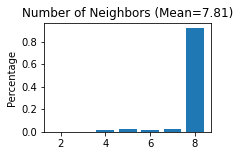

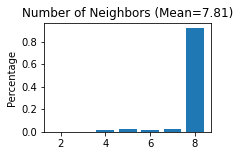

In [18]:

adata2=automatic_2D_peak_picking(adata,10200,num_marker=1250,cluster_method='mclust',r=1.7,
                                 k_class_first=5,k_class=10,alpha=0.1,pre_resolutation=0.1)


In [12]:
import psutil
Memory_Information = psutil.virtual_memory()

In [13]:
Memory_Information

svmem(total=269966172160, available=49665851392, percent=81.6, used=217840447488, free=13377466368, active=222963847168, inactive=28027928576, buffers=4741378048, cached=34006880256, shared=117100544, slab=3421323264)

In [37]:
pre_label_9=adata2.obs['mclust']

In [9]:
adata2.uns["mclust_colors"]=['#1f77b4','#d62728','#17becf','#aa40fc','#ff7f0e',
'#b5bd61','#279e68','#8c564b','#aec7e8','#e377c2',]

<AxesSubplot:title={'center':'SmartGate'}, xlabel='spatial1', ylabel='spatial2'>

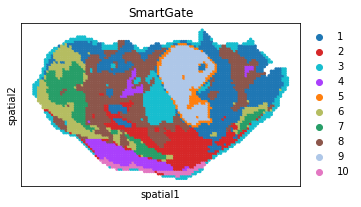

In [10]:
plt.rcParams["figure.figsize"] = (5, 3)

sc.pl.embedding(adata2, basis='spatial',color='mclust',show=False,title='SmartGate',s=44)

In [11]:
#labels=pd.DataFrame(adata2.obs['mclust'])
#labels.to_csv('../SSC_SASA_data/main-fig-data/smartgate_pig_11.csv',index=0)

In [12]:
#ma=pd.DataFrame(mass[np.array(adata2.var_names).astype(int)])
#ma.to_csv('../SSC_SASA_data/main-fig-data/smartgate_pig_11_iter_mass.csv',index=0)

In [13]:
#mass=pd.DataFrame(adata2.X)
#mass.to_csv('../SSC_SASA_data/main-fig-data/smartgate_pig_11_iter_data.csv',index=0)

In [14]:
adata2

AnnData object with n_obs × n_vars = 4959 × 4822
    obs: 'expression_louvain_label', 'mclust'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'Spatial_Net', 'pca', 'neighbors', 'louvain', 'rank_genes_groups', 'mclust_colors'
    obsm: 'spatial', 'X_pca', 'STAGATE'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [19]:
adata2.obs['mclust']=adata2.obs['mclust'].astype(str)

... storing 'mclust' as categorical


<AxesSubplot:title={'center':'Heart'}, xlabel='spatial1', ylabel='spatial2'>

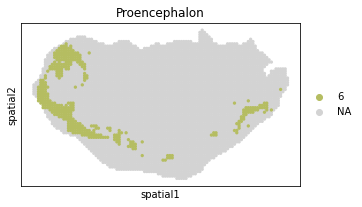

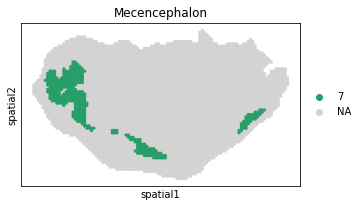

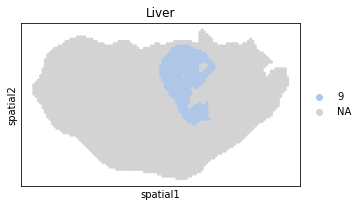

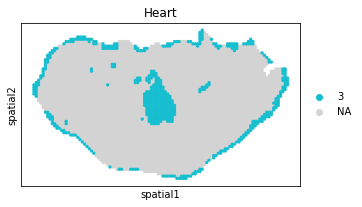

In [20]:
#for i in range(np.unique(adata.ons['mclust'])):
sc.pl.embedding(adata2, basis='spatial',color='mclust',show=False,title='Proencephalon',s=44,groups=['6'])
sc.pl.embedding(adata2, basis='spatial',color='mclust',show=False,title='Mecencephalon',s=44,groups=['7'])
sc.pl.embedding(adata2, basis='spatial',color='mclust',show=False,title='Liver',s=44,groups=['9'])
sc.pl.embedding(adata2, basis='spatial',color='mclust',show=False,title='Heart',s=44,groups=['3'])
#sc.pl.embedding(adata2, basis='spatial',color='mclust',show=False,title='SmartGate',s=44,groups=['6'])

In [21]:
pd.DataFrame(adata2.uns['rank_genes_groups']['names']).head(5)

,1,2,3,4,5,6,7,8,9,10
0,1915,387,445,36,1578,8263,7926,1337,4625,1430
1,1891,196,767,37,1241,8286,7925,1372,4649,1442
2,1890,388,446,12,2126,8262,7923,1361,4624,1454
3,1916,195,768,38,1242,8287,7924,4050,4313,1441
4,1914,197,444,13,1577,8261,1844,1336,4648,1431


In [22]:
adata_norm=adata2.copy()
norm_X=pd.DataFrame(adata_norm.X)
norm_X=(norm_X-np.min(norm_X))/(np.max(norm_X)-np.min(norm_X))
# _range = np.max(data) - np.min(data)
adata_norm.X=norm_X

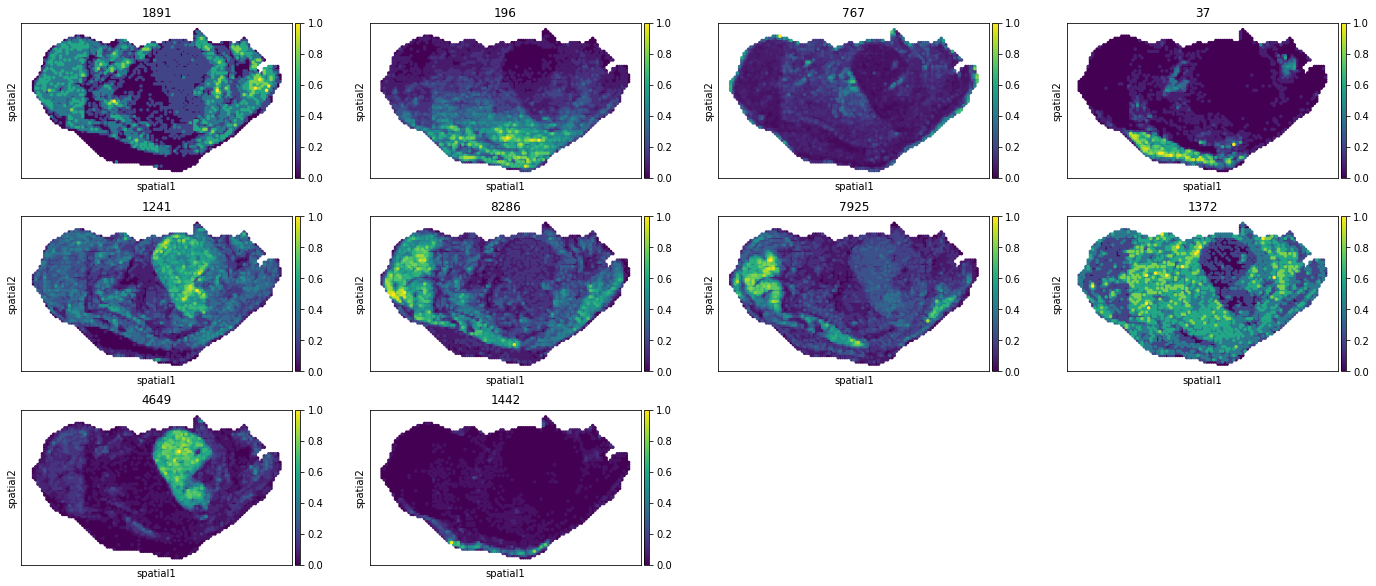

In [23]:
sc.pl.embedding(adata_norm, basis="spatial",color=adata2.uns['rank_genes_groups']['names'][1],
                s=50)

In [24]:
marker_ion=pd.DataFrame(adata2.uns['rank_genes_groups']['names']).head(2)
marker_ion=np.array(marker_ion).reshape(-1,)

In [25]:
sc.tl.rank_genes_groups(adata2, 'mclust', method='t-test')

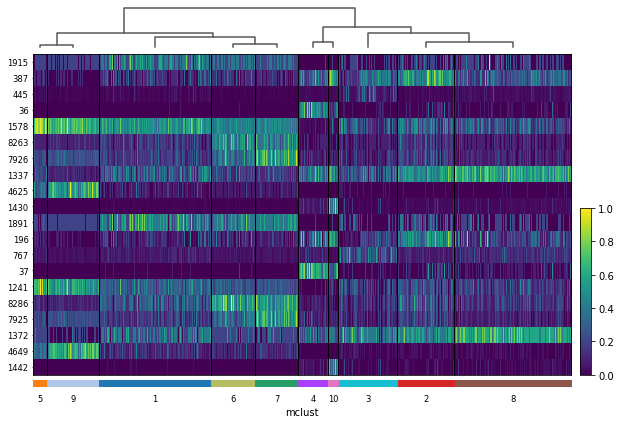

In [26]:
sc.pl.heatmap(adata_norm,marker_ion,groupby='mclust',dendrogram=True,
              swap_axes=True,figsize=[10,7])